# Importing necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.text import Tokenizer


Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

# Loading the data

In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# checking the data

In [3]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
df.shape

(5572, 2)

#checking if any null value exist in dataset

In [5]:
df.isnull().sum()
df.isna().sum()


Category    0
Message     0
dtype: int64

# Checking if HTML tags exist

In [6]:
#checking HTML tag....

for i in df['Message'].values:
    if(len(re.findall('<.*?>', i))):
        print(i)
        print('\n')
    
    
    
    

<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.


<Forwarded from 88877>FREE entry into our £250 weekly comp just send the word ENTER to 88877 NOW. 18 T&C www.textcomp.com


<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches


<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min


URGENT! Your Mobile number has been awarded a <UKP>2000 prize GUARANTEED. Call 09061790125 from landline. Claim 3030. Valid 12hrs only 150ppm


PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04




# Loading the english stop words

In [7]:
stop = set(stopwords.words('english'))
print(stop)
print(type(stop))

{'yourself', 'during', 'his', 'whom', 'aren', 'needn', 'myself', 'y', 'but', 'she', 'no', 'do', "don't", 'its', 'ourselves', 'isn', 'me', "shouldn't", 'because', 'own', 'it', "aren't", 'ours', 'your', 'll', "wouldn't", 'themselves', 'he', 'hers', 'will', 'being', 'i', 'above', 'weren', 'were', "doesn't", 'for', 'nor', 'below', 'same', 'couldn', 'these', 'did', 'which', 'has', 'out', 'what', 'they', "you'll", 'any', 'until', "hadn't", 'more', "she's", 'about', 'from', "hasn't", 'all', "should've", 'mightn', 'shouldn', 'does', 'd', 'again', 'against', 'only', "haven't", 'their', 'a', 'mustn', 'wouldn', 'been', "needn't", 'having', 'over', 'shan', 'just', "it's", 'that', 've', 'most', 'who', 'so', "mustn't", 'my', 'haven', "didn't", 'herself', 'than', 'yours', 'ma', 'those', "you're", 'through', 'down', 'such', 'both', 'under', "you'd", 'while', 'off', 'when', 'o', 'wasn', 'some', 'this', 'm', 'ain', 'too', "weren't", "you've", 'not', 'very', 'can', 'an', 'our', 'by', 'other', 'few', 'be'

# droping the duplicates values

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5157, 2)

In [10]:
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

# Function to clean punctuation

In [11]:
def cleanpunc(sentences):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentences)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

# Loading the snowball stemmer

In [12]:
from nltk.stem import SnowballStemmer
sno = SnowballStemmer('english')

In [13]:
str1=' '
s=' '
i = 0
final_string = []
for wor in df['Message'].values:
    fil_wor = []
    for w in wor.split():
        for cleanedwords in cleanpunc(w).split(): #cleaning punctuation
            if(cleanedwords.isalpha() and len(cleanedwords)>2): #checking value is alpha numeric or not and we know adjective size is greater than 2
                if(cleanedwords.lower() not in stop):
                    s=(sno.stem(cleanedwords.lower())).encode('utf8') #applying stemmer and converting the character to lowercase
                    fil_wor.append(s)
    str1 = b" ".join(fil_wor) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [14]:
#copying the column to exixsting dataset
df['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review


In [15]:
df

,Category,Message,CleanedText
0,ham,"Go until jurong point, crazy.. Available only ...",b'jurong point crazi avail bugi great world bu...
1,ham,Ok lar... Joking wif u oni...,b'lar joke wif oni'
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,b'free entri wkli comp win cup final tkts may ...
3,ham,U dun say so early hor... U c already then say...,b'dun say earli hor alreadi say'
4,ham,"Nah I don't think he goes to usf, he lives aro...",b'nah dont think goe usf live around though'
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,b'time tri contact pound prize claim easi call...
5568,ham,Will ü b going to esplanade fr home?,b'go esplanad home'
5569,ham,"Pity, * was in mood for that. So...any other s...",b'piti mood suggest'
5570,ham,The guy did some bitching but I acted like i'd...,b'guy bitch act like interest buy someth els n...


# Visualizing the spam and ham words

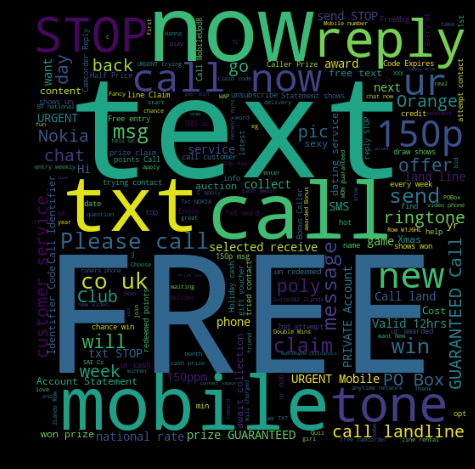

In [16]:
spam_words = ' '.join(list(df[df['Category'] == 'spam']['Message']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

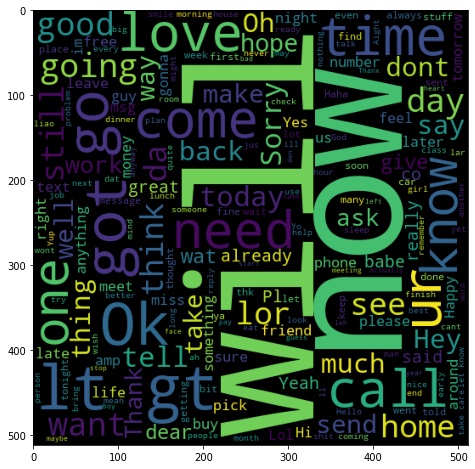

In [17]:
ham_words = ' '.join(list(df[df['Category'] == 'ham']['Message']))
ham_wc = WordCloud(width = 512, height = 512).generate(ham_words)
plt.figure(figsize = (10, 8))
plt.imshow(ham_wc)
plt.show()

In [18]:
df.columns

Index(['Category', 'Message', 'CleanedText'], dtype='object')

In [19]:
df['label'] = df['Category'].map({'ham': 0, 'spam': 1})
df

,Category,Message,CleanedText,label
0,ham,"Go until jurong point, crazy.. Available only ...",b'jurong point crazi avail bugi great world bu...,0
1,ham,Ok lar... Joking wif u oni...,b'lar joke wif oni',0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,b'free entri wkli comp win cup final tkts may ...,1
3,ham,U dun say so early hor... U c already then say...,b'dun say earli hor alreadi say',0
4,ham,"Nah I don't think he goes to usf, he lives aro...",b'nah dont think goe usf live around though',0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,b'time tri contact pound prize claim easi call...,1
5568,ham,Will ü b going to esplanade fr home?,b'go esplanad home',0
5569,ham,"Pity, * was in mood for that. So...any other s...",b'piti mood suggest',0
5570,ham,The guy did some bitching but I acted like i'd...,b'guy bitch act like interest buy someth els n...,0


In [20]:
#droping the Category  columns
df.drop('Category', axis=1, inplace=True)
df['CleanedText'] = df['CleanedText'].apply(str)

In [21]:
#distributing the dataset into feature and label
x = df['CleanedText']
y = df['label']

In [22]:
from keras.utils import to_categorical
y = to_categorical(y)

In [23]:

tkn = Tokenizer(nb_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')

tkn.fit_on_texts(df['CleanedText'].values)
from keras.preprocessing.sequence import pad_sequences


x = tkn.texts_to_sequences(df['CleanedText'].values)
x = pad_sequences(x)


/home/vipin/.local/lib/python3.6/site-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


# Spliting the dataset into train and test feature and labels

In [24]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Applying LSTM on trainijg data

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
embed_dim = 128
lstm_out = 196
max_fatures = 2000

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = x.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 65, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 65, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
batch_size=2
model.fit(x_train, y_train,validation_split=0.2, epochs = 30, batch_size=batch_size)


Train on 3300 samples, validate on 825 samples
Epoch 1/30
3300/3300 [==============================] - 121s 37ms/step - loss: 0.1365 - accuracy: 0.9585 - val_loss: 0.1185 - val_accuracy: 0.9624
Epoch 2/30
3300/3300 [==============================] - 119s 36ms/step - loss: 0.0505 - accuracy: 0.9858 - val_loss: 0.1148 - val_accuracy: 0.9697
Epoch 3/30
3300/3300 [==============================] - 120s 36ms/step - loss: 0.0333 - accuracy: 0.9915 - val_loss: 0.1283 - val_accuracy: 0.9685
Epoch 4/30
3300/3300 [==============================] - 122s 37ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.1399 - val_accuracy: 0.9685
Epoch 5/30
3300/3300 [==============================] - 120s 36ms/step - loss: 0.0171 - accuracy: 0.9964 - val_loss: 0.1405 - val_accuracy: 0.9697
Epoch 6/30
3300/3300 [==============================] - 136s 41ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.1542 - val_accuracy: 0.9697
Epoch 7/30
3300/3300 [==============================] - 140s 42ms/step

# checking the accuracy

In [29]:

pred = model.predict(x_test)
print('Accuracy : ',accuracy_score(y_test, pred.round()))


Accuracy :  0.9748062015503876
